In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import warnings as w
w.filterwarnings('ignore')
import sklearn 
import mlflow
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv(r"D:\Wine_ML_AlGO\WineQualityModel\artifacts\data_ingestion\WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


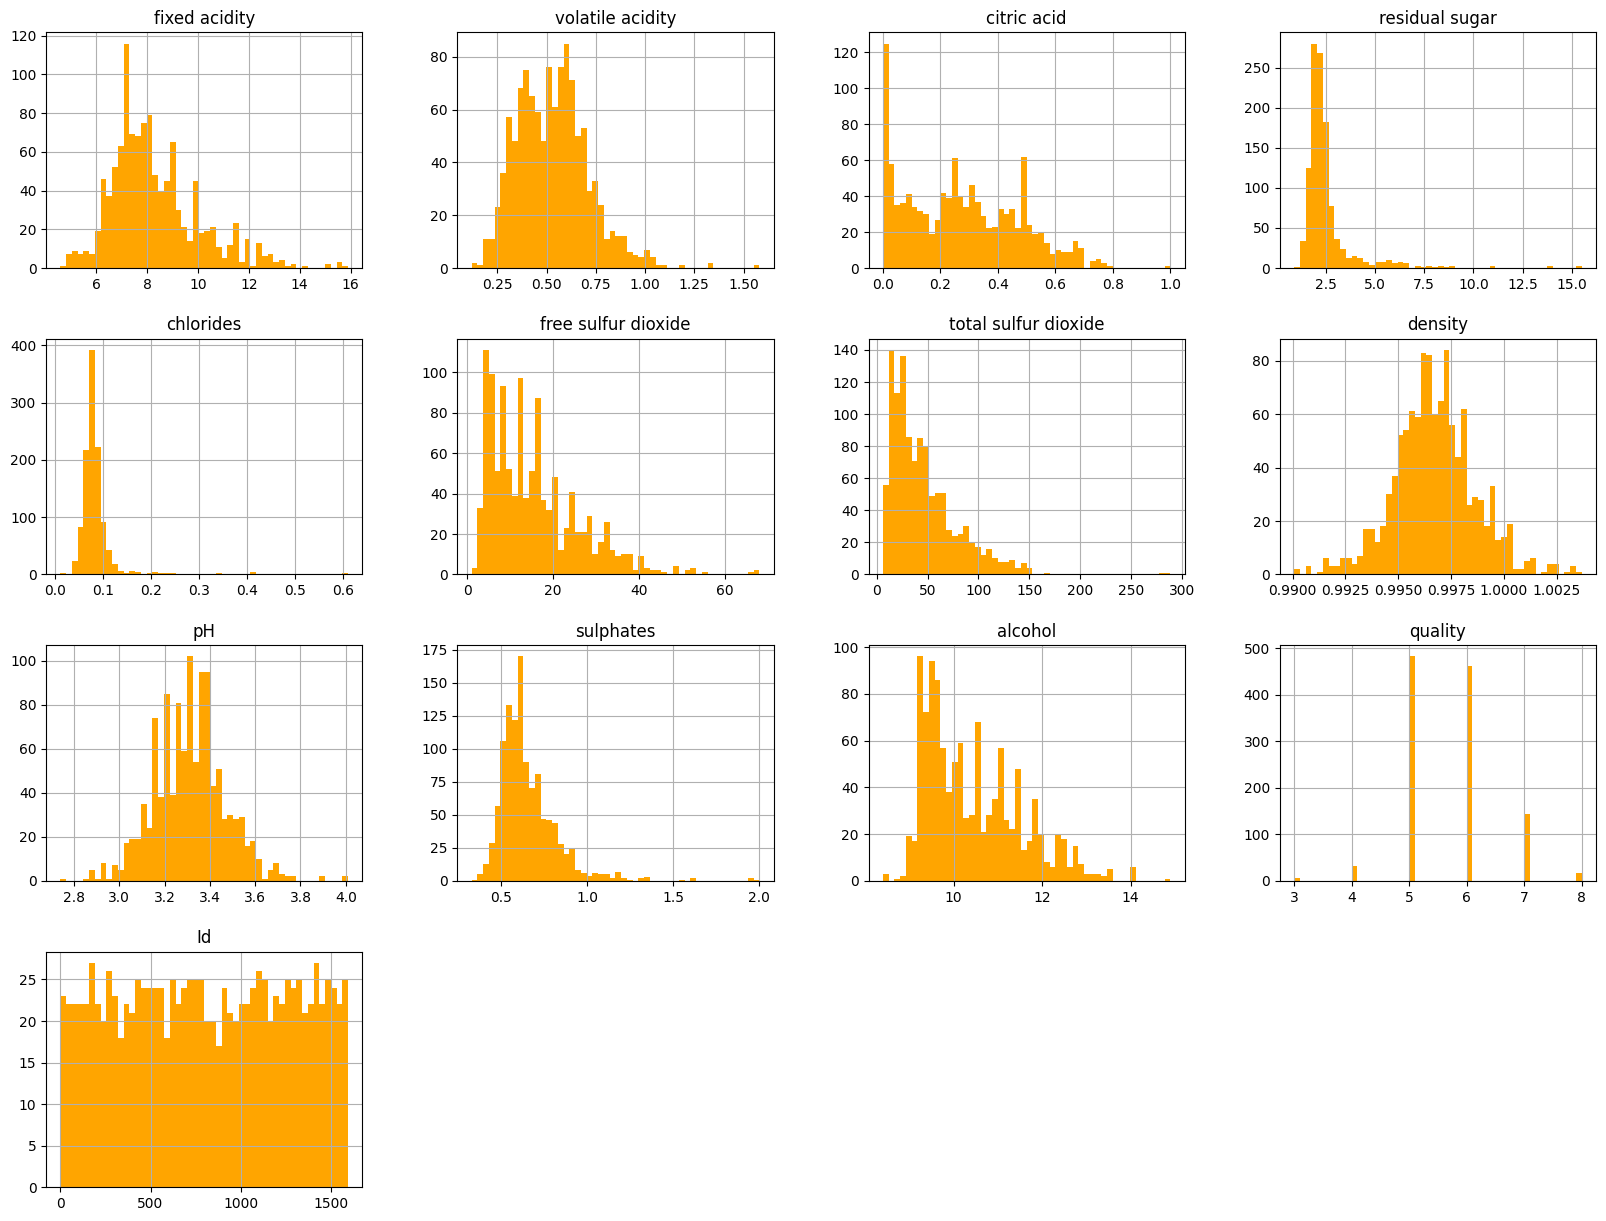

In [3]:
df.hist(column=df.columns,bins=50,figsize=(20,15),color='orange')
plt.show()

In [4]:
#to see the information about df object 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


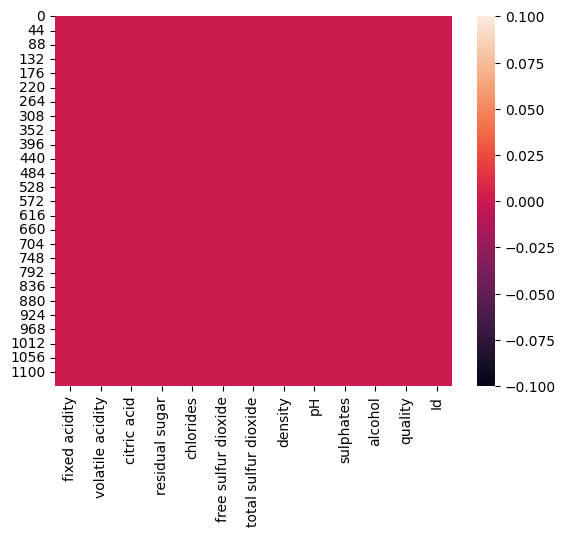

In [5]:
sb.heatmap(df.isnull())
plt.show()

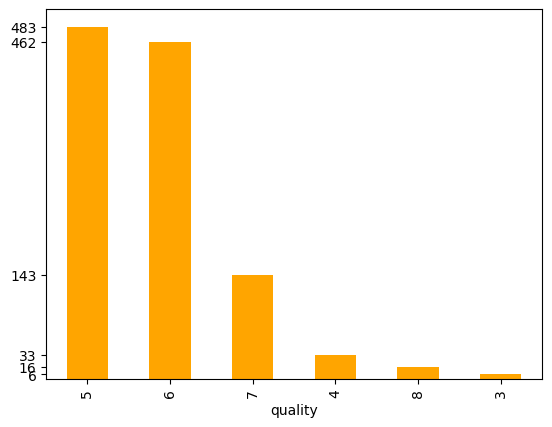

In [6]:
#now visualizing the output variable it having how many class init
df['quality'].value_counts().plot(kind = "bar",color='orange')
plt.yticks(df['quality'].value_counts())
plt.show()

#below result we can classify it is multi class classifier output

In [7]:
#selecting input and output variable
x = df.drop(['quality'],axis=1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4


In [8]:
y = df['quality']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [9]:
#splitting the data into 80:20 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((914, 12), (229, 12), (914,), (229,))

In [10]:
#scaling we do only on input variable
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [11]:
#ElasticNet model of sklearn 
#will used Linear regression with combined L1 and L2 priors as regularizer.
from sklearn.linear_model import ElasticNet

#creating an object Elasticnet 
en = ElasticNet(alpha=1.0, l1_ratio=0.5,random_state=42)
en

ElasticNet(random_state=42)

In [12]:
#now training the model
en.fit(x_train,y_train)

ElasticNet(random_state=42)

In [13]:
#testing the model
y_pred = en.predict(x_test)

In [14]:
#comparing the actual and predicted output variable
dict = {
    'actual_output':y_test,
    "predicted_output":y_pred
}
pd.DataFrame(dict)

,actual_output,predicted_output
158,5,5.656455
1081,6,5.656455
291,5,5.656455
538,6,5.656455
367,6,5.656455
...,...,...
66,4,5.656455
328,6,5.656455
67,5,5.656455
231,6,5.656455


In [15]:
#now evaluating the accuracy of model finding out r2_score,mse,mae
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-1.5464265512799003e-05
0.556481594138102
0.6401249844724948
